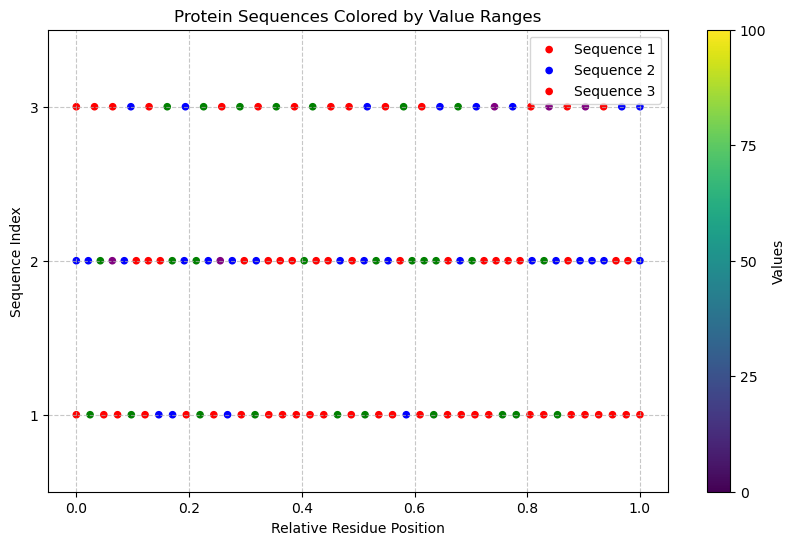

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Function to assign colors based on value ranges
def assign_color(value):
    if value >= 0 and value < 50:
        return 'red'
    elif value >= 50 and value < 75:
        return 'blue'
    elif value >= 75 and value < 95:
        return 'green'
    else:
        return 'purple'

# Function to plot protein sequences
def plot_protein_sequences(protein_sequences):
    num_sequences = len(protein_sequences)
    max_length = max(len(seq) for seq in protein_sequences)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    for i, seq in enumerate(protein_sequences):
        normalized_positions = np.linspace(0, 1, len(seq))
        colors = [assign_color(value) for value in seq]
        ax.scatter(normalized_positions, [i]*len(seq), c=colors, s=20, label=f"Sequence {i+1}")

    ax.set_xlabel('Relative Residue Position')
    ax.set_ylabel('Sequence Index')
    ax.set_title('Protein Sequences Colored by Value Ranges')
    ax.set_yticks(np.arange(num_sequences))
    ax.set_yticklabels(np.arange(1, num_sequences + 1))
    ax.set_ylim(-0.5, num_sequences - 0.5)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()

    # Add color bar
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=100))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, ticks=[0, 25, 50, 75, 100])
    cbar.set_label('Values')

    plt.show()

# Example protein sequences (arrays of numbers 0-100)
protein_sequences = [
    np.random.randint(0, 101, np.random.randint(20, 50)),
    np.random.randint(0, 101, np.random.randint(20, 50)),
    np.random.randint(0, 101, np.random.randint(20, 50))
]

# Plotting the protein sequences
plot_protein_sequences(protein_sequences)

# Version 2 with bars

[[1.   0.5  0.25 0.5  0.25 0.25 0.25 0.75 0.5  0.75 0.5  0.5  0.5  0.75
  0.75 0.5  0.25 0.25 0.5  0.5  0.25 1.   0.25 0.25 0.25 0.   0.   0.
  0.   0.  ]
 [0.5  0.25 0.25 0.25 0.5  0.25 0.5  1.   0.5  0.25 0.5  0.25 0.25 0.25
  0.75 0.75 0.25 0.5  1.   0.75 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.  ]
 [0.75 0.75 0.25 0.75 1.   0.25 0.75 0.5  0.75 0.5  1.   0.75 0.25 0.25
  0.5  0.25 1.   0.5  0.75 0.25 0.75 0.5  0.25 0.25 0.5  0.75 0.25 0.5
  0.75 0.25]]


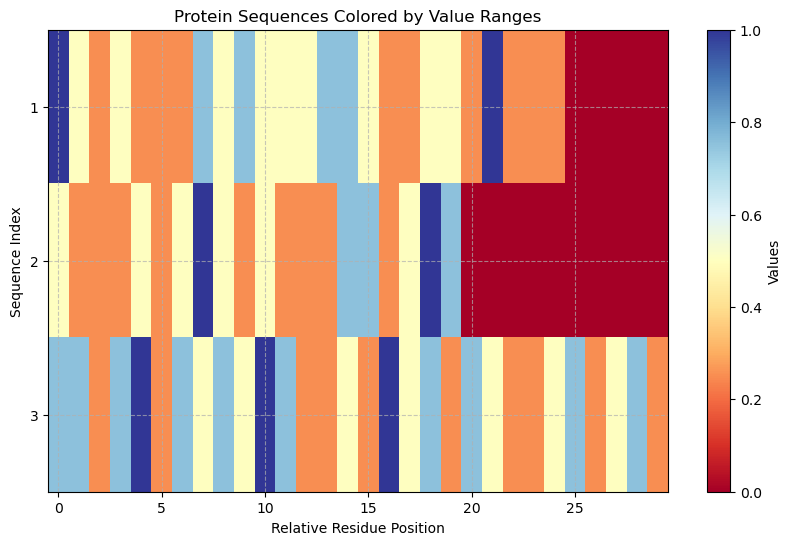

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Function to assign colors based on value ranges
def assign_color(value):
    if value >= 0 and value < 50:
        return 0.25  # red
    elif value >= 50 and value < 75:
        return 0.5   # blue
    elif value >= 75 and value < 95:
        return 0.75  # green
    else:
        return 1.0   # purple

# Function to plot protein sequences
def plot_protein_sequences(protein_sequences):
    num_sequences = len(protein_sequences)
    max_length = max(len(seq) for seq in protein_sequences)
    
    # Create a matrix to represent the heatmap
    heatmap = np.zeros((num_sequences, max_length))
    
    # Populate the heatmap with colors based on the protein sequences
    for i, seq in enumerate(protein_sequences):
        for j, value in enumerate(seq):
            heatmap[i, j] = assign_color(value)
    print(heatmap)
    # Plotting the heatmap
    plt.figure(figsize=(10, 6))
    plt.imshow(heatmap, aspect='auto', cmap='RdYlBu', interpolation='nearest')
    plt.xlabel('Relative Residue Position')
    plt.ylabel('Sequence Index')
    plt.title('Protein Sequences Colored by Value Ranges')
    plt.colorbar(label='Values')
    plt.yticks(np.arange(num_sequences), np.arange(1, num_sequences + 1))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Example protein sequences (arrays of numbers 0-100)
protein_sequences = [
    np.random.randint(0, 101, np.random.randint(20, 40)),
    np.random.randint(0, 101, np.random.randint(20, 40)),
    np.random.randint(0, 101, np.random.randint(20, 40))
]

# Plotting the protein sequences
plot_protein_sequences(protein_sequences)

In [142]:
def assign_color(value):
    if value >= 0 and value < 50:
        return 'red'  # red
    elif value >= 50 and value < 75:
        return 'blue'  # blue
    elif value >= 75 and value < 95:
        return 'green'  # green
    else:
        return 'purple'   # purple

In [143]:
def convert_to_relative_v2(categorized, length=10):
    quantum = 1/len(categorized)
    resolution = np.array([i*quantum for i in range(len(categorized)-1)] + [1])
    
    result = []
    # iterate through n desired length
    for i in range(length):
        current = i/length
        # find the category that the current value falls into
        
        for j in range(len(resolution)):
            category = categorized[j]
            percent = resolution[j]
            # print(current, percent, category)
            if current <= percent:
                result.append(category)
                break
    return result

In [144]:
arrays = [np.random.randint(0, 101, np.random.randint(20, 40)),
            np.random.randint(0, 101, np.random.randint(20, 40)),
            np.random.randint(0, 101, np.random.randint(20, 40))]

# apply function to each value in numpy array
categorized = [np.array([assign_color(value) for value in test_conf]) for test_conf in arrays]
heatmap = [convert_to_relative_v2(categorized_array, 1000) for categorized_array in categorized]

AttributeError: AxesImage.set() got an unexpected keyword argument 'color_discrete_map'

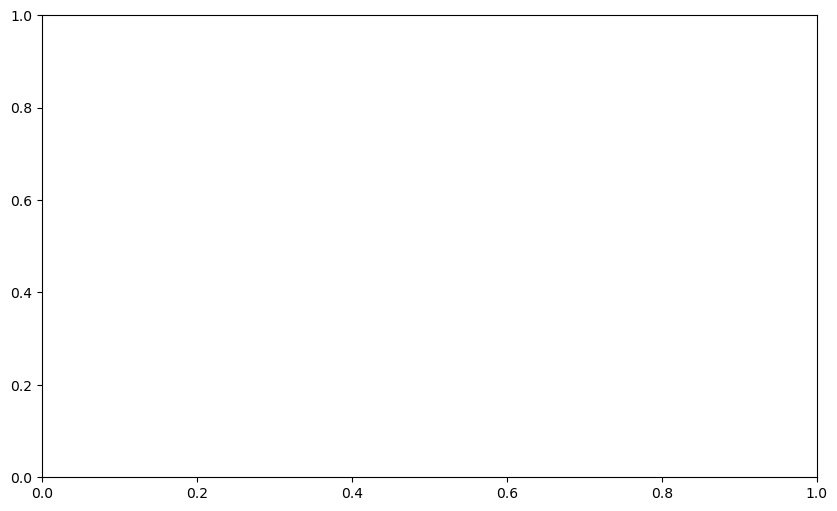

In [146]:
plt.figure(figsize=(10, 6))
plt.imshow(heatmap, aspect='auto', color_discrete_map='identity', interpolation='nearest')
plt.xlabel('Relative Residue Position')
plt.ylabel('Sequence Index')
plt.title('Protein Sequences Colored by Value Ranges')
plt.colorbar(label='Values')
# plt.yticks(np.arange(num_sequences), np.arange(1, num_sequences + 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [140]:
import plotly.express as px

In [141]:
px.imshow(heatmap, color_discrete_map={0: 'red', 1: 'blue', 2: 'green', 3: 'purple'})

TypeError: imshow() got an unexpected keyword argument 'color_discrete_map'

In [147]:
?imshow

Object `imshow` not found.


In [155]:
arrays = [np.random.randint(0, 101, np.random.randint(20, 40)),
            np.random.randint(0, 101, np.random.randint(20, 40)),
            np.random.randint(0, 101, np.random.randint(20, 40))]

heatmap = [convert_to_relative_v2(categorized_array, 1000) for categorized_array in arrays]

In [178]:
def discrete_colorscale(bvals, colors):
    """
    <https://chart-studio.plotly.com/~empet/15229/heatmap-with-a-discrete-colorscale/#/>
    bvals - list of values bounding intervals/ranges of interest
    colors - list of rgb or hex colorcodes for values in [bvals[k], bvals[k+1]],0<=k < len(bvals)-1
    returns the plotly  discrete colorscale
    """
    if len(bvals) != len(colors)+1:
        raise ValueError('len(boundary values) should be equal to  len(colors)+1')
    bvals = sorted(bvals)     
    nvals = [(v-bvals[0])/(bvals[-1]-bvals[0]) for v in bvals]  #normalized values
    
    dcolorscale = [] #discrete colorscale
    for k in range(len(colors)):
        dcolorscale.extend([[nvals[k], colors[k]], [nvals[k+1], colors[k]]])
    return dcolorscale    

In [210]:
bvals = [0, 50, 70, 90, 100]
#pulled directly from AF website
colors = ['#f47c48', '#feda0c', '#66caf3', '#355daa']
colorscale = discrete_colorscale(bvals, colors)
bvals = np.array(bvals)
tickvals = [np.mean(bvals[k:k+2]) for k in range(len(bvals)-1)] #position with respect to bvals where ticktext is displayed
ticktext = [f'<{bvals[1]}'] + [f'{bvals[k]}-{bvals[k+1]}' for k in range(1, len(bvals)-2)]+[f'>{bvals[-2]}']
text_names = ['Very low', 'Low', 'High','Very high', ]

In [212]:
ticktext = [f"{text} ({value})" for text, value in zip(text_names, ticktext)]

In [213]:
import plotly.graph_objects as go
import numpy as np
protein_names = ["Protein 1", "Protein 2", "Protein 3"]
my_heatmap = go.Heatmap(z=heatmap, 
                        colorscale=colorscale,
                        y = protein_names,
                        x = np.arange(0,1,1/1000),
                        colorbar=dict(title='Confidence (pLDDT)', ticktext=ticktext, tickvals=tickvals),
                        ygap=5)

In [214]:
fig = go.Figure(data=[my_heatmap])
fig.update_layout(template="seaborn", yaxis=dict(autorange='reversed'))
fig.show()